# Modern Deep Learning workflows for the RMie Correction and Classification of raw tissue spectra 

In [1]:
import openvibspec as ov
import openvibspec.io_ftir as ovio
xd = '/newton_local/DFG/src_311219/A01_2112_MIE_OFF_gepuzzelt.mat'
C = ovio.import_dat(xd,'C')
WN = ovio.import_dat(xd,'WN')
d = C.reshape(384*384,1428)

#### Common methods of machine learning in the processing of FTIR data are algorithms such as Kmeans or Random Forest. OpenVibSpec contains warppers of the python library scikit-learn for these methods, which will be replaced by optimized implementations in a later versions of OpenVibSpec

https://scikit-learn.org/stable/

To use these methods from OpenVibSpec, the import of these methods must first be created. This is done with the following command:

In [2]:
import openvibspec.ml_ftir as ovml


The pure Kmeans works thereby in the specification of data and the parameter for used centroids. As return value the cluster result is returned as Numpy-Array

In [14]:
km = ovml.kmeans(d[23000:24000,:],c=19)


In [16]:
km

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  7,  7, 10, 11, 10,  7,  7,  7,  7,  7,
       10, 10,  1,  1,  1,  1,  6,  3,  8,  8,  8,  6,  6,  6,  3,  3,  9,
        9,  3,  3,  3,  3,  9,  9,  8,  8,  8,  6,  1,  4,  4,  2,  2,  2,
        2,  2,  4,  2,  4,  4,  4,  4,  4,  4,  1,  4,  4,  4,  4,  2,  2,
        2,  2,  2,  4,  3

## Random Forest Training

The other common method includes a wrapper for the well-known Random Forest classifier.
Since this is a supervised algorithm, the X value for the spectra must be given as well as their Gruond truth (y). For a simplified representation we use the presegmentation from the Kmeans here. 

For a closer look at the possibilities of pathology annotated presegmentation and subsequent training of a random forest please study the following paper:

Großerueschkamp et al., 2015 ," Marker-free automated histopathological annotation of lung tumour subtypes by FTIR imaging"

Kuepper et al., 2015, "Label-free classification of colon cancer grading using infrared spectral histopathology"

In [21]:

rf = ovml.randomforest_train(d[23000:24000,:],km, save_file_path='save_test')


In [22]:
rf

(array([[-4.11804626e-03, -5.81399444e-03, -7.21911993e-03, ...,
         -1.37065602e-02, -1.30953882e-02, -1.27243297e-02],
        [-4.35743714e-04, -2.50514154e-03, -4.38329205e-03, ...,
         -6.91889366e-03, -8.51019099e-03, -9.41335596e-03],
        [-5.22627914e-03, -3.09451972e-03, -2.28386163e-03, ...,
         -6.39650691e-03, -6.92378497e-03, -6.88702520e-03],
        ...,
        [ 1.49916112e-01,  1.51689366e-01,  1.55354694e-01, ...,
          4.26505953e-01,  4.22667325e-01,  4.20054883e-01],
        [ 1.54936537e-01,  1.56585053e-01,  1.59199610e-01, ...,
          4.52367425e-01,  4.50681448e-01,  4.49519873e-01],
        [ 1.43474445e-01,  1.43951163e-01,  1.45396963e-01, ...,
          4.57336634e-01,  4.56316054e-01,  4.58602250e-01]]),
 array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
 

## In the next example we show the use of pre-trained deep neural networks to do the resonant Mie scattering carrection

 We will use a subset of only 1000 spectra to show the usage of OpenVibSpecs Deep Learning procedures.  As an convention we 're loading the 3D dataset in 2D matrix, with x*y,z shape. The function gives the prediction and the used model as a return value.


In [3]:
dl = ovml.DeepLearn()

In [9]:
%%timeit 
dacorr, model = dl.net(d[23000:24000,:909],miecorr=True)

Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
332 ms ± 35.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### To give a short overview of the capabilities of OpenVibSpec, when using deep learning in the field of FTIR-Spectra, please take look at the average processing time for a subset of 1000 raw spectra.

In [10]:
dacorr.shape

(1000, 909)

### This first figure shows the result of the Deep Learning based resonant Mie correction of FTIR spectra. 

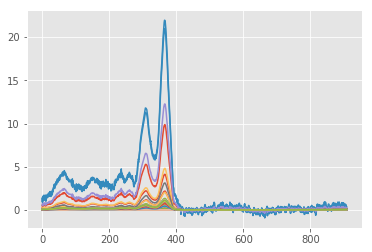

In [11]:
import matplotlib.pyplot as plt
plt.plot(dacorr.T);
plt.show()

### The second figure shows the corresponding raw FTIR spectra.

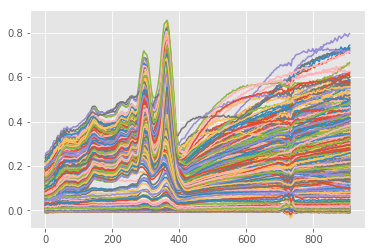

In [13]:
plt.plot(d[23000:24000,:909].T);
plt.show()

### The second possibility to use the pre-trained deep neural networks is the classification of raw FTIR data. To see all details about the training and the data used please see the work of 

### Raulf at al., 2019; "Deep representation learning for domain adaptable classification of infrared spectral imaging data"

In [7]:
daclass, model_cl = dl.net(d[23000:24000,:450],classify=True)

Loaded model from disk


The classification model takes 450 data points between 950 and 1800 1/cm [WVN] and returns a Numpy-Array with a segmentation over 19 possible tissue classes as return value

In [12]:
import numpy as np
np.argmax(daclass,axis=1)

array([ 7,  9,  9,  9,  9,  1, 14,  9,  9,  9,  9,  9,  9,  9,  9,  2,  9,
        9,  7,  9,  9, 11,  4,  9,  9,  9,  9,  9,  9,  9,  9, 11,  9,  9,
        9,  4,  9,  9,  9,  9,  4,  7,  9, 11,  9, 11,  9, 11,  9,  9,  4,
        9,  9, 11,  9, 11,  9,  7, 11, 11,  1,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  3,  1,  9,  9,  9, 11,  9,  1,  9,  9, 11,  9,
        1, 14,  7,  9,  9,  9,  9,  9, 11,  9,  9,  2, 11,  9,  7,  9,  9,
        9, 11,  9,  9, 11,  9,  9,  4,  9, 11,  9, 11,  9,  9,  9,  9,  4,
        9,  9, 15,  9,  9,  9, 11,  9,  9,  9,  9,  9,  9,  9, 11,  9,  9,
        9,  3,  7,  9,  9,  9,  9,  9,  9,  9,  3,  9,  9,  9,  9,  4,  9,
        9, 11,  9,  9, 11,  9,  4, 14, 14, 13, 14, 14,  9, 15,  4, 14, 14,
       14, 14, 14, 14, 14, 14, 14,  9, 14,  4,  3, 14, 14, 14,  4, 14, 14,
       10, 14,  4, 18, 14,  9, 15, 14, 14,  4, 14, 14,  4, 14, 14, 14, 14,
        4, 14,  4, 14, 14, 14, 14,  4,  2, 14,  4, 12, 14, 14, 14, 12, 14,
       14, 14, 14, 12,  9